## Installing dependencies and importing packages

In [1]:
# Make sure numpy version==1.23
!pip3 install numpy==1.23
import numpy as np

if(np.version.version[:4] != '1.23'):
  !pip3 uninstall numpy -y
  !pip3 install numpy==1.23

In [2]:
# Install modules

!pip3 install tensorflow --upgrade
!pip3 install tensorflow_hub --upgrade
!pip3 install tensorflow_text --upgrade
!pip3 install tf-models-official --upgrade
!pip3 install nltk --upgrade
!pip3 install nlpaug --upgrade
!pip3 install transformers
!pip3 uninstall accelerate -y
!pip3 install accelerate

  Using cached tf_models_official-2.12.0-py2.py3-none-any.whl (2.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached immutabledict-2.2.4-py3-none-any.whl (4.1 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 17.6 MB/s eta 0:00:00
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.3 MB/s eta 0:00:00
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 6.3 MB/s eta 0:00:00
  Created wheel for pyyaml: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.callbacks import EarlyStopping
from transformers import pipeline
import nlpaug.augmenter.word as naw
from official.nlp import optimization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEE

In [4]:
'''
ONLY ON KAGGLE
Unnecessary after the 1st run in each session
'''
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
# Mount Google Drive
#from google.colab import drive
#drive.mount("/content/drive")

## Reading and preparing the dataset

In [3]:
'''
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/FYP/datasets/ethos.csv')
'''

df = pd.read_csv('/kaggle/input/ethos-dataset/ethos.csv')

# Remove rows with null value
df = df.dropna()
df.head(5)

,text,label
0,You should know women's sports are a joke,1
1,You look like Sloth with deeper Down’s syndrome,1
2,You look like Russian and speak like Indian. B...,1
3,"Women deserve to be abused, I guess.",1
4,Women are made for making babies and cooking d...,1


In [263]:
# Class Distribution
print(df['label'].value_counts())

0    565
1    433
Name: label, dtype: int64


In [264]:
# Define stopwords

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords0 = set(STOPWORDS)
stopwords.update(stopwords0)
stopwords.add("RT")

In [7]:
# Remove rows with null value
df = df.dropna()
df.head(5)

,text,label
0,You should know women's sports are a joke,1
1,You look like Sloth with deeper Down’s syndrome,1
2,You look like Russian and speak like Indian. B...,1
3,"Women deserve to be abused, I guess.",1
4,Women are made for making babies and cooking d...,1


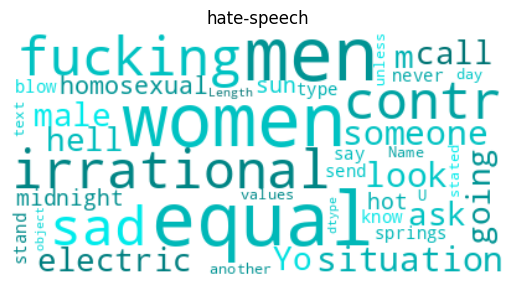

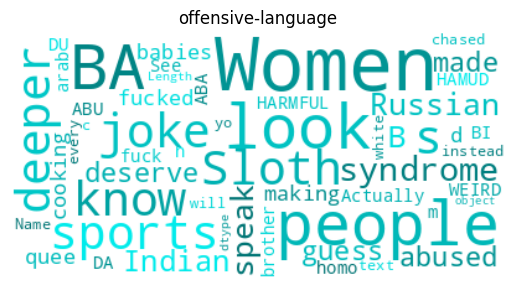

In [9]:
# WordCloud
def generate_word_cloud(label, title):
    def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
        h = 180
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
        return "hsl({}, {}%, {}%)".format(h, s, l)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=60,
        random_state=42
    ).generate(str((df.loc[df["label"] == label].text)))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3), interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(0, "hate-speech")
generate_word_cloud(1, "offensive-language")

### Splitting the data between train, validation and test sets:

In [8]:
# Split training, testing, and validation sets with index

X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.label.values,    
)

X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].label.values,
    test_size=0.10,
    random_state=42,
    stratify=df.loc[X_train_].label.values,  
)

In [9]:
# Convert to df, reset index
df_train = df.loc[X_train]
df_val = df.loc[X_val]
df_test = df.loc[X_test]

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## Aug

In [10]:
# Define synonym augmenter
aug = naw.SynonymAug(aug_src='wordnet',
                     stopwords='stopwords')

def augment_text(sentence):
    new_sentence = aug.augment(sentence, n=1)
    return new_sentence[0]

In [11]:
# Create a temp df
df2 = df_train.copy()
df2['label'] = df2['label'].astype(int)
temp = pd.DataFrame(columns=['text', 'label'])

print("Training set:")
print(df2.shape[0])
print(df2['label'].value_counts())

Training set:
808
0    457
1    351
Name: label, dtype: int64


In [12]:
# Calc number of extra samples to be augmented and concat it to temp
unique_labels = df2['label'].unique()
label_data_count = df2['label'].value_counts()
max_label = label_data_count.idxmax()
max_data_count = label_data_count[max_label]
num_classes = df2['label'].nunique()

print("Number of samples to be augmented in each label:")

for label in unique_labels:
    label_data = df2[df2['label'] == label]
    label_data_count = label_data.shape[0]
    extra = 0

    # calc extra samples needed so that df_train has >= 3000 samples
    if (max_data_count * num_classes) < 3000:
        extra = math.ceil(math.ceil((3000 / num_classes)) - max_data_count)

    if not(label == max_label and extra == 0):
        # calc extra samples needed to balance df_train
        add = max_data_count - label_data_count + extra if extra > 0 else max_data_count - label_data_count
        print("Label", label, "=", add)
        if add > 0:
            # concat temp with data to be augmented
            temp = pd.concat([temp, label_data.sample(n=add, replace=True)], ignore_index=True)

Number of samples to be augmented in each label:
Label 1 = 1149
Label 0 = 1043


In [13]:
# Augment the data in temp
print("Extra data to be augmented:")
print(temp['label'].value_counts())

temp['text'] = temp['text'].apply(augment_text)

Extra data to be augmented:
1    1149
0    1043
Name: label, dtype: int64


In [14]:
# Concat df_train with temp
df_train = pd.concat([df_train, temp], ignore_index=True)
print("After Augmentation:")
print(df_train.shape[0])
print(df_train['label'].value_counts())

After Augmentation:
3000
1    1500
0    1500
Name: label, dtype: int64


## Build TensorFlow input 

In [15]:
batch_size = 32

df_train['label'] = df_train['label'].astype(float)
df_val['label'] = df_val['label'].astype(float)
df_test['label'] = df_test['label'].astype(float)

train_ds = tf.data.Dataset.from_tensor_slices((df_train.text.values.astype(str), df_train.label.values))
val_ds = tf.data.Dataset.from_tensor_slices((df_val.text.values.astype(str), df_val.label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.text.values.astype(str), df_test.label.values))

train_ds = train_ds.shuffle(len(df_train)).batch(batch_size, drop_remainder=False)
print(train_ds)
val_ds = val_ds.shuffle(len(df_val)).batch(batch_size, drop_remainder=False)
print(val_ds)
test_ds = test_ds.shuffle(len(df_test)).batch(batch_size, drop_remainder=False)
print(test_ds)


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


## Loading roBERTa from TensorFlow Hub

In [16]:
tfhub_handle_encoder = "https://tfhub.dev/jeongukjae/roberta_en_cased_L-12_H-768_A-12/1"
tfhub_handle_preprocess = "https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1"

## roBERTa

In [17]:
def build_model(num_classes, output_bias=None, l2_weight=0.01):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    # Input layer for text data
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    
    # Preprocessing layer
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    
    # Preprocess text input
    encoder_inputs = preprocessing_layer(text_input)
    
    # Encoder layer
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='roBERTa_encoder')
    
    # Pass encoder inputs through encoder layer
    outputs = encoder(encoder_inputs)
    
    # Get output from encoder's pooled_output
    net = outputs['pooled_output']
    
    # Dense layer with ReLU activation and L2 weight regularization
    net = tf.keras.layers.Dense(512, activation="relu",
                                kernel_regularizer=tf.keras.regularizers.l2(l2_weight))(net)
    
    # Dropout layer
    net = tf.keras.layers.Dropout(0.2)(net)
    
    if num_classes == 2:
        # For binary, dense layer uses sigmoid activation
        net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier',
                                    bias_initializer=output_bias,
                                    kernel_regularizer=tf.keras.regularizers.l2(l2_weight))(net)
    elif num_classes > 2:
        # For multi-class, dense layer uses softmax activation
        net = tf.keras.layers.Dense(num_classes, activation="softmax", name='classifier',
                                    bias_initializer=output_bias,
                                    kernel_regularizer=tf.keras.regularizers.l2(l2_weight))(net)
    
    return tf.keras.Model(text_input, net)


In [18]:
'''
Restart and rerun if this error occurs:
"TypeError: this __dict__ descriptor does not support '_DictWrapper' objects"
'''
model = build_model(num_classes)

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


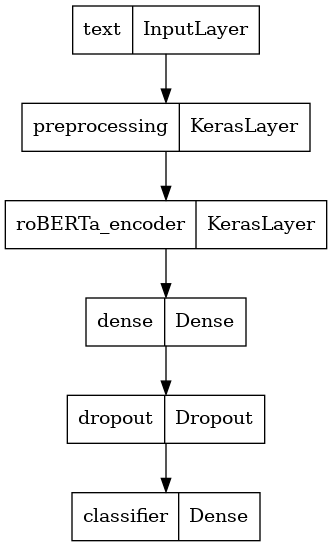

In [19]:
tf.keras.utils.plot_model(model)

In [20]:
# Define loss function and metrics

if(num_classes == 2):
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    metrics = tf.keras.metrics.BinaryAccuracy('accuracy')
elif(num_classes > 2):
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [21]:
epochs = 30
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr = 3e-5

# Callback function
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                             min_delta=0,
                                             patience=3,
                                             verbose=1,
                                             mode='max',
                                             baseline=None,
                                             restore_best_weights=False,
                                             start_from_epoch=0),
           ]

# Optimizer
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')

history = model.fit(x=train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=callback,
                    steps_per_epoch=steps_per_epoch,
                    verbose=1)

Training model with https://tfhub.dev/jeongukjae/roberta_en_cased_L-12_H-768_A-12/1
Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 [==============================] - 205s 2s/step - loss: 6.8498 - accuracy: 0.5090 - val_loss: 6.7000 - val_accuracy: 0.7333
Epoch 2/30
94/94 [==============================] - 185s 2s/step - loss: 6.4612 - accuracy: 0.8007 - val_loss: 6.3426 - val_accuracy: 0.8333
Epoch 3/30
94/94 [==============================] - 185s 2s/step - loss: 6.1439 - accuracy: 0.9183 - val_loss: 6.3569 - val_accuracy: 0.8556
Epoch 4/30
94/94 [==============================] - 185s 2s/step - loss: 5.8445 - accuracy: 0.9647 - val_loss: 6.2803 - val_accuracy: 0.8111
Epoch 5/30
94/94 [==============================] - 185s 2s/step - loss: 5.3834 - accuracy: 0.9857 - val_loss: 5.7485 - val_accuracy: 0.8556
Epoch 6/30
94/94 [==============================] - 186s 2s/step - loss: 4.6934 - accuracy: 0.9890 - val_loss: 5.2212 - val_accuracy: 0.8556
Epoch 6: early stopping


In [22]:
loss, accuracy = model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 4s 884ms/step - loss: 5.3774 - accuracy: 0.8200
Loss: 5.3773884773254395
Accuracy: 0.8199999928474426


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


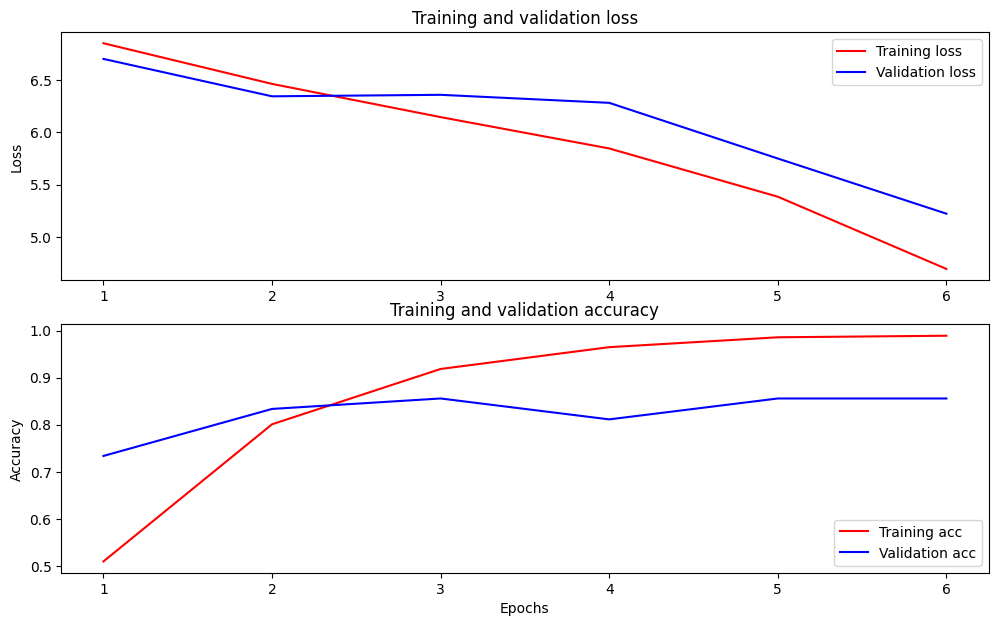

In [23]:
# Plot graph

def plot_history(history):
    history_dict = history.history
    print(history_dict.keys())

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs_graph = range(1, len(acc) + 1)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
    fig.tight_layout()

    # Plot training and validation loss
    axes[0].plot(epochs_graph, loss, 'r', label='Training loss')
    axes[0].plot(epochs_graph, val_loss, 'b', label='Validation loss')
    axes[0].set_title('Training and validation loss')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot training and validation accuracy
    axes[1].plot(epochs_graph, acc, 'r', label='Training acc')
    axes[1].plot(epochs_graph, val_acc, 'b', label='Validation acc')
    axes[1].set_title('Training and validation accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend(loc='lower right')

    plt.show()
    
plot_history(history)

## Unfreeze last 2 layers, fit again

In [24]:
# Unfreeze last 2 layers

unfreeze_layers = 2
for layer in model.layers[-unfreeze_layers:]:
    layer.trainable = True

In [25]:
# Define loss function and metrics

if(num_classes == 2):
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    metrics = tf.keras.metrics.BinaryAccuracy('accuracy')
elif(num_classes > 2):
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [26]:
# Fit again

model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with unfrozen layers')
history1 = model.fit(x=train_ds,
                   validation_data=val_ds,
                   epochs=epochs,
                   callbacks=callback,
                   steps_per_epoch=steps_per_epoch,
)

Training model with unfrozen layers
Epoch 1/30
94/94 [==============================] - 197s 2s/step - loss: 4.1329 - accuracy: 0.9960 - val_loss: 4.8431 - val_accuracy: 0.8556
Epoch 2/30
94/94 [==============================] - 184s 2s/step - loss: 3.6143 - accuracy: 0.9977 - val_loss: 4.3044 - val_accuracy: 0.8556
Epoch 3/30
94/94 [==============================] - 185s 2s/step - loss: 3.1940 - accuracy: 0.9977 - val_loss: 4.1822 - val_accuracy: 0.8444
Epoch 4/30
94/94 [==============================] - 186s 2s/step - loss: 2.8773 - accuracy: 0.9947 - val_loss: 3.7727 - val_accuracy: 0.8333
Epoch 4: early stopping


In [27]:
loss, accuracy = model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 4s 972ms/step - loss: 3.7861 - accuracy: 0.8400
Loss: 3.7860913276672363
Accuracy: 0.8399999737739563


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


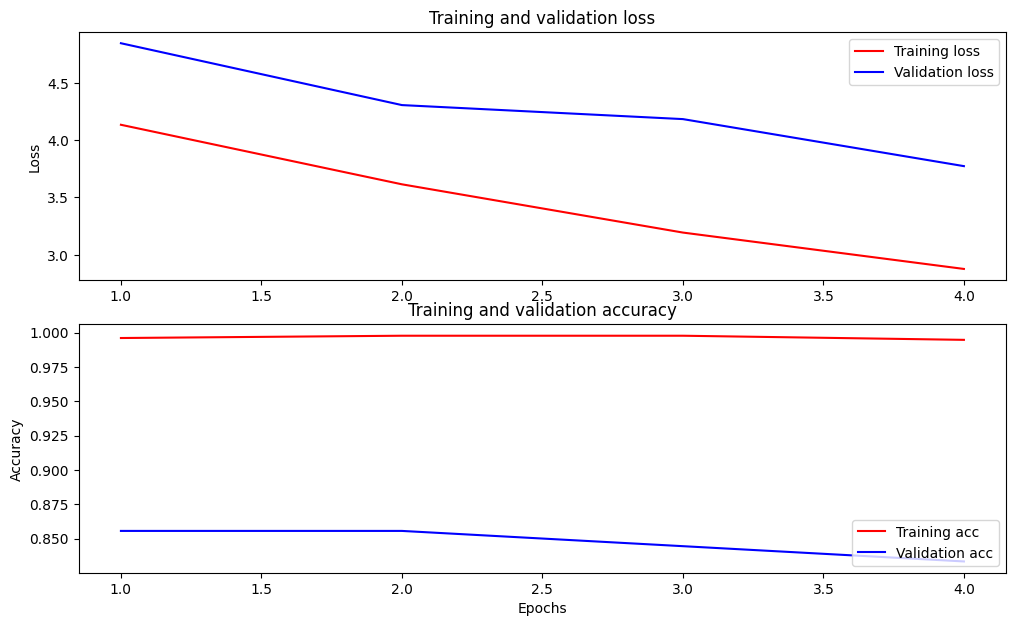

In [28]:
plot_history(history1)